# Notebook 8: More Discrete Random Variables and More Distributions 
***

In this notebook we'll get some more practice identifying and working with the Binomial, Negative Binomial, Geometric, and Poisson distributions. 

We'll need Numpy and Matplotlib for this notebook, so let's load them.  We'll also probably need SciPy's binom function for computing binomial coefficients as well as Python's factorial function.  

In [4]:
import numpy as np 
import matplotlib.pylab as plt 
from scipy.special import binom
from math import factorial
import math
%matplotlib inline

### Exercise 1 - Defective Hard Drives 
*** 

A factory manufactures sold state hard drives for Seagate Technology.  Approximately $4\%$ of hard drives that come off of a particular assembly line are defective. For each of the scenarios below: 

1. Define an appropriate random variable and distribution for the experiment. 
2. State the values that the random variable can take on. 
3. Find the probability that the random variable takes on the value $X = 3$. 
4. State any assumptions that you need to make 

**Part A**: Out of 20 drives, $k$ of them are defective. 

In [5]:
# Define X to be the number of defective drives
n=20
X = range(0,n+1)
p = 0.04
k=3
#X has a binomial distribution

p_X_3 = binom(n,k)*(p**3)*(1-p)**(n-k)

print(p_X_3)

#assume prob is constant and not changing

0.036449853488319195


**Part B**: The number of defective drives made that day, where the rate of defective parts per day is 10. 

In [6]:
# X has a poisson distribution. 
# lambda = 10/day
# X can range from 0 to the total number of drives in a day.
#Probability that X=3 (meaning 3 defective parts were made in 1 day)

p_X_3_poisson = (10**3)*((math.e)**(-10))/(factorial(3))

print(p_X_3_poisson)

0.007566654960414146


**Part C**: While we observe the assembly line, the first defective drive observed is the $k$th drive observed overall.

In [7]:
# X has a geometric distribution
# X can take on values from 1 to infinity?
# probability that X=3
kk=3
p_X_3_geometric = ((1-p)**(kk-1))*p
print(p_X_3_geometric)

0.036864


**Part D**: While we observe the assembly line, the third defective drive observed is the $k$th drive observed overall.

In [5]:
# X is negative binomial
# X can take on values from 3 to infinity

k=3
r=3
p=0.04
p_X_3_negbin = binom(k-1,r-1)*(p**k)*(1-p)**(k-r)
print(p_X_3_negbin)

6.400000000000001e-05


### Exercise 2 - Winning Concert Tickets 
*** 

You and a friend want to go to a concert, but unfortunately only one ticket is still available. The man who sells the tickets decides to toss a coin until heads appears. In each toss heads appears with probability $p$, where $0 < p < 1$, independent of each of the previous tosses. If the number of tosses needed is odd, your friend is allowed to buy the ticket; otherwise you can buy it. Would you agree to this arrangement?

**Part A**: What discrete distribution would be useful in solving this problem? 

In [6]:
# Geometric Distribution! because stop when get heads
p = 0.5

n_trials = 1001

# Odd tosses i
# Even tosses j
prob_odd = 0
prob_even = 0

for i,j in zip(range(1,n_trials), range(1,n_trials)):
    i = 2*i-1
    j = 2*j
    p_i = ((1-p)**(i-1))*p
    prob_odd += p_i
    p_j = ((1-p)**(j-1))*p
    prob_even += p_j
    
print("The probability of a Heads results on an odd trial is: ", prob_odd)
print("The probability of a Heads results on an even trial is: ", prob_even) 

The probability of a Heads results on an odd trial is:  0.6666666666666666
The probability of a Heads results on an even trial is:  0.3333333333333333


**Part B**: In a minute we'll compute the approximate probability that you win the concert tickets, but before doing so, can you solve this problem by intuition (and a small amount of math)? 

**Part C**: Write a Python function that takes in the probability of heads on the coin and returns the probability mass function of the random variable described above.  You can safely assume that nobody wants to stick around for more than 100 coin flips, so only consider up to and including the 100th coin flip.  So, the output of this function should be an array or list of length 100.

In [7]:
def pmf_geo(p):
    
    n_max = 100
    pmf = np.array([p*((1-p)**(k-1)) for k in range(1, n_max+1)])
    
    return pmf 

**Part D**: Use the function you wrote in **Part C** to estimate the probabilities that your friend or you win the ticket for different values of the bias of the coin.  Use $p = 0.25$, $~p = 0.5$, and $p = 0.75$. 

In [8]:
# The probability that you win the ticket when p = 0.25

p=0.25
print("Probability that your friend will win:",np.sum(np.array([pmf_geo(p)[i] for i in range(0,100,2)])))
print("Probability that you will win:",np.sum(np.array([pmf_geo(p)[i] for i in range(1,100,2)])))

p=0.5
print("Probability that your friend will win:",np.sum(np.array([pmf_geo(p)[i] for i in range(0,100,2)])))
print("Probability that you will win:",np.sum(np.array([pmf_geo(p)[i] for i in range(1,100,2)])))

p=0.75
print("For p = {}, Probability that your friend will win = {}".format(p,np.sum(np.array([pmf_geo(p)[i] for i in range(0,100,2)]))))
print("Probability that you will win:",np.sum(np.array([pmf_geo(p)[i] for i in range(1,100,2)])))





Probability that your friend will win: 0.5714285714283882
Probability that you will win: 0.42857142857129116
Probability that your friend will win: 0.6666666666666666
Probability that you will win: 0.3333333333333333
For p = 0.75, Probability that your friend will win = 0.8
Probability that you will win: 0.2


### Exercise 3 - Implementing and Sampling the Geometric Distribution 
***

**Part A**: Write a function flips_until_heads that simulates the coin slipping scenario in **Exercise 2**. Your function should take as its sole argument the probability $p$ of flipping Heads for the coin and return the number of flips observed when you find your first Heads.  

In [9]:
coin = np.array(["H", "T"])

def flips_until_heads(p):
    coin_flip = np.random.choice(coin, p=[p,1-p])
    counter = 1
    while coin_flip != "H":
        counter += 1
        coin_flip = np.random.choice(coin,p=[p,1-p])
    return counter

**Part B**: Now, run many trials of the experiment and count how many trials result in each value of the random variable.  Make a _density_ histogram of the results, using $p=0.25$. 

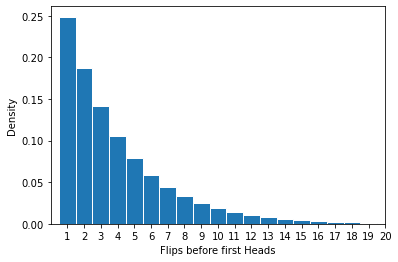

In [10]:
ntrials = 100000
p=0.25

def coin_sim(ntrials,p):
    count_X = []
    for i in range(0,ntrials):
        count_X.append(flips_until_heads(p))
    return(count_X)    

#print(coin_sim(ntrials,p))

#fig, ax = plt.subplots(figsize = (12,8))

bins = np.arange(0.5, 50.5, 1)
plt.hist(coin_sim(ntrials,p), density = True, edgecolor = 'white', bins=bins)
plt.xticks(range(1,50))
plt.xlim([0,20])
plt.xlabel('Flips before first Heads')
plt.ylabel('Density')
plt.show()

**Part C**: Use the function you wrote in **Exercise 2** to make a bar plot of the probability mass function of $X$.  Does it look like the density histogram from **Part B**?  If not, run your simulation in **Part B** for more trials.  Does the situation improve?  Again, use $p=0.25$ in your codes.

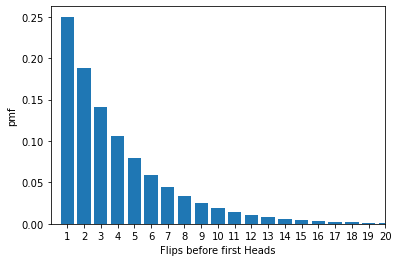

In [11]:
p=0.25
#ntrials = 1000

pmf = pmf_geo(p)
plt.bar(range(1,len(pmf)+1), pmf)
plt.xticks(range(1,50))
plt.xlim([0,20])
plt.xlabel('Flips before first Heads')
plt.ylabel('pmf')
plt.show()

### Exercise 4 - Predicting Space Shuttle Disasters 
***

The space shuttle _Challenger_ disaster occurred in January 1986 when one of six O-rings failed and caused the main fuel tank to explode.  The failure of the O-ring was likely due to the low temperature at the time of the launch.  Further analysis shows that the probability of an O-ring failure as a function of temperature is given by 

$$
p(T) = \frac{e^{a+bT}}{1 + e^{a+bT}}
$$

where $a = 5.085$ and $b = -0.1156$, and $T$ is the temperature (in degrees Fahrenheit) at the time of the launch of the shuttle. At the time of the _Challenger_ launch the temperature was $T=31$, corresponding to a probability of O-ring failure of $p(31) = 0.8178$. 

**Part A**: Let $X$ be the number of failing O-rings at launch temperature $31^{\circ} F$.  Assume that the failure of each of the six O-rings is independent. What type of probability distribution does $X$ have, and what are the values of its parameters? 

In [12]:
# X can take on integer values from 0 to 6
# X is a binomial distribution

**Part B**: Calculate (by hand) the probability $P(X \geq 1)$ that at least one O-ring fails.

$P(X \geq 1) = 1-P(X < 1) = 1 - P(X = 0) $ 

In [13]:
p = 0.8178
prob = 1 - binom(6,0)*((1-p)**6)
print("Thus P(X >= 1): ", prob)

Thus P(X >= 1):  0.9999634160802406


**Part C**:  Let us assume that all space shuttles will be launched at $81^{\circ}F$.  With this temperature, the probability of an O-ring failure is equal to $p(81) = 0.0137$. 

What is the probability that during 23 launches no O-ring will fail, but that at least one O-ring will fail during the 24th launch of the space shuttle? 

**Part D**: What is the probability that no O-ring fails during 24 launches? 